In [0]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [0]:
from google.colab import files
files.upload()

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [0]:
!pip install -q kaggle

In [0]:
!kaggle competitions download -c histopathologic-cancer-detection

  0% 0.00/1.33M [00:00<?, ?B/s]
100% 1.33M/1.33M [00:00<00:00, 43.9MB/s]
  0% 0.00/5.10M [00:00<?, ?B/s]
100% 5.10M/5.10M [00:00<00:00, 82.3MB/s]
 99% 1.30G/1.30G [00:09<00:00, 137MB/s]
100% 1.30G/1.30G [00:09<00:00, 145MB/s]
100% 4.97G/4.98G [00:38<00:00, 109MB/s]
100% 4.98G/4.98G [00:39<00:00, 137MB/s]


In [0]:
!mkdir /content/train
!mkdir /content/test

In [0]:
!unzip -q /content/train.zip -d /content/train/
!unzip -q /content/test.zip -d /content/test/
!unzip -q /content/train_labels.csv.zip

In [0]:
label_df=pd.read_csv('/content/train_labels.csv')
label_df.head()

,id,label
0,f38a6374c348f90b587e046aac6079959adf3835,0
1,c18f2d887b7ae4f6742ee445113fa1aef383ed77,1
2,755db6279dae599ebb4d39a9123cce439965282d,0
3,bc3f0c64fb968ff4a8bd33af6971ecae77c75e08,0
4,068aba587a4950175d04c680d38943fd488d6a9d,0


In [0]:
label_df['label'].value_counts()

0    130908
1     89117
Name: label, dtype: int64

In [0]:
train_path = '/content/train/'
test_path = '/content/test/'

In [0]:
train_ids = np.asarray(label_df['id'].values)
train_labels = np.asarray(label_df['label'].values)

In [0]:
train_fnames = ['{}{}.tif'.format(train_path, id) for id in train_ids]

In [0]:
data = ImageDataBunch.from_lists(train_path, fnames=train_fnames, labels=train_labels, valid_pct=0.2, size=48, bs=64).normalize(imagenet_stats)

In [0]:
data.classes

[0, 1]

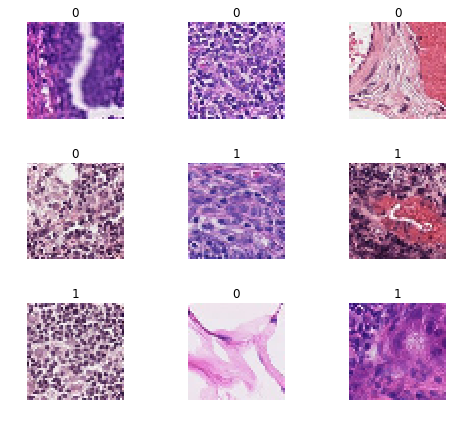

In [0]:
data.show_batch(rows=3, figsize=(7,6))

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:00<00:00, 148326621.57it/s]


In [0]:
learn.model

In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.343508,0.313162,0.132371,06:27
1,0.288532,0.253363,0.103193,05:32
2,0.255187,0.232617,0.094217,05:19
3,0.248977,0.230350,0.093308,05:13


In [0]:
learn.save('stage-1')

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


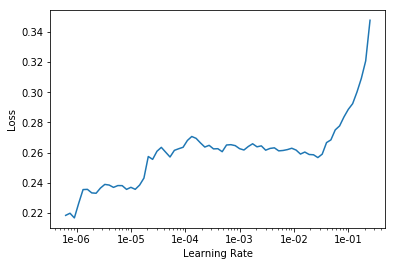

In [0]:
learn.recorder.plot()

In [0]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-5))

epoch,train_loss,valid_loss,error_rate,time
0,0.253386,0.219019,0.088104,05:29
1,0.230687,0.213646,0.085922,05:23


In [0]:
learn.load('stage-1');

In [0]:
learn50 = cnn_learner(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:00<00:00, 147110921.96it/s]


In [0]:
learn50.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.316317,0.286224,0.117646,05:45
1,0.245125,0.221892,0.088444,05:29
2,0.219874,0.199396,0.078082,05:23
3,0.211779,0.193787,0.076855,05:24


In [0]:
learn50.save('stage-1 50')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


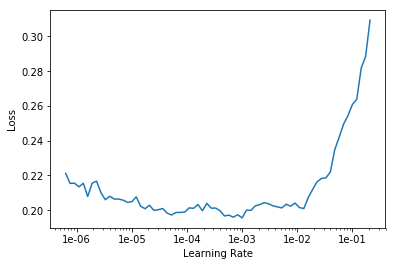

In [0]:
learn50.lr_find()
learn50.recorder.plot()

In [0]:
learn50.unfreeze()
learn50.fit_one_cycle(3, max_lr=1e-3)

In [0]:
learn50.load('stage-1 50')